# Benjamin Wilke
## NLP Homework 6

In [101]:
import scipy
import numpy as np
import string
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import add
from tensorflow.keras.layers import LSTM, SimpleRNN, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support


Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings.

### Question 1

Evaluate text similarity of Amazon book search results by doing the following:

Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 

In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 

Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

### Amazon search for "data driven"

In an attempt to find this book: Data Driven: Harnessing Data and AI to Reinvent Customer Engagement

https://www.amazon.com/Data-Driven-Harnessing-Reinvent-Engagement/dp/B07MMNCY2P/ref=sr_1_8?keywords=data+driven&qid=1584127022&s=books&sr=1-8

In [4]:
# skipping the Sponsored (ads)
titles_list = [
    "Driven by Data 2.0: A Practical Guide to Improve Instruction",
    "Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control",
    "Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems",
    "Data-Driven Leadership",
    "Creating a Data-Driven Organization: Practical Advice from the Trenches",
    "Data Driven: Harnessing Data and AI to Reinvent Customer Engagement",
    "Driven by Data: A Practical Guide to Improve Instruction",
    "Data Driven",
    "Data-Driven Marketing: The 15 Metrics Everyone in Marketing Should Know",
    "Cribsheet: A Data-Driven Guide to Better, More Relaxed Parenting, from Birth to Preschool",
    "A Winning Enterprise Data Strategy: Becoming A Data-Driven Organisation",
    "The Power of Experiments: Decision Making in a Data-Driven World",
    "Data Visualisation: A Handbook for Data Driven Design",
    "Applications of Computational Intelligence in Data-Driven Trading",
    "Letting Data Lead: How to Design, Analyze, and Respond to Classroom Assessment (Gain Actionable Insights Through Effective Assessment Methods and Data Interpretation)",
    "Data Driven: How Performance Analytics Delivers Extraordinary Sales Results",
    "Data Driven Marketing: Leverage Data to Increase Sales, Grow Profits, and Land More Customers",
    "Data Driven Business Transformation: How Businesses Can Disrupt, Innovate and Stay Ahead of the Competition",
    "Data Science from Scratch: Complete Guide to Learning the Data Science Process & What You Need to Know About: Analytics, Mining, Structures, Management, Driven, Privacy",
    "The Data-Driven School: Collaborating to Improve Student Outcomes",
    "Transforming Teaching and Learning Through Data-Driven Decision Making",
    "Data Leverage: Unlocking the Surprising Growth Potential of Data Partnerships",
    "Data Science for Fundraising: Build Data-Driven Solutions Using R",
    "APPLYING STATISTICAL KNOWLEDGE IN DATA DRIVEN STRATEGIES AND DECISION MAKING",
    "Marketing Analytics: Data-Driven Techniques with Microsoft Excel"
]

In [4]:
len(titles_list)

25

In [8]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [130]:
glovemodel = loadGloveModel("glove.6B.100d.txt")

Loading Glove Model
Done. 400000  words loaded!


In [139]:
def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = np.mean([glovemodel[word] for word in preprocess(s1) if word in glovemodel.keys()],axis=0)
    vector_2 = np.mean([glovemodel[word] for word in preprocess(s2) if word in glovemodel.keys()],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    return round((1-cosine)*100,2)

In [136]:
def preprocess(sent):
    sent = ''.join([word for word in sent if word not in string.punctuation])     # remove punctuation 
    sent = sent.lower()                                                           # set to lowercase
    sent = ' '.join([word for word in sent.split() if word not in stopwords])     # remove stopwords
    sent = ' '.join([word for word in sent.split() if word.isalpha()])            # remove numbers
    return [word for word in sent.split()]

In [144]:
s1 = "Data Driven: Harnessing Data and AI to Reinvent Customer Engagement"

for idx, each in enumerate(titles_list):
    print("Similarity between Search and Result {0}: {1}%".format(idx + 1, cosine_distance_wordembedding_method(s1, each)))

Similarity between Search and Result 1: 85.79%
Similarity between Search and Result 2: 72.77%
Similarity between Search and Result 3: 81.41%
Similarity between Search and Result 4: 45.67%
Similarity between Search and Result 5: 70.08%
Similarity between Search and Result 6: 100.0%
Similarity between Search and Result 7: 85.79%
Similarity between Search and Result 8: 86.8%
Similarity between Search and Result 9: 73.17%
Similarity between Search and Result 10: 61.3%
Similarity between Search and Result 11: 78.03%
Similarity between Search and Result 12: 70.25%
Similarity between Search and Result 13: 83.75%
Similarity between Search and Result 14: 74.7%
Similarity between Search and Result 15: 82.95%
Similarity between Search and Result 16: 82.31%
Similarity between Search and Result 17: 83.5%
Similarity between Search and Result 18: 82.62%
Similarity between Search and Result 19: 85.44%
Similarity between Search and Result 20: 58.79%
Similarity between Search and Result 21: 68.73%
Simil

### Question 2

Now evaluate using a major search engine.

Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

Which one has the highest similarity measure? 

In [145]:
searching = "Data Driven: How Performance Analytics Delivers Extraordinary Sales Results"
capsule1 = "Data Driven is a uniquely practical guide to increasing sales success, using the power of data analytics. Written by one of the world's leading authorities on the topic, this book shows you how to transform the corporate sales function by leveraging big data into better decision-making, more informed strategy, and increased effectiveness throughout the organization."
capsule20 = "Don’t be worry Data Driven: How Performance Analytics Delivers Extraordinary Sales Results can bring any time you are and not make your tote space or bookshelves’ grow to be full because you can have it inside your lovely laptop even cell phone."

In [146]:
cosine_distance_wordembedding_method(searching, capsule1)

88.96

In [147]:
cosine_distance_wordembedding_method(searching, capsule20)

86.86

### Question 3

Take the dataset from Homework 4 and run it through an RNN, an LSTM, and a Bidirectional RNN.

Report your accuracy, precision, and F1 for each class (‘O’ counts as a class, ‘PAD’ should be ignored).

Turn in a Confusion Matrix of your results for each method.

### Prepare Data like Homework 4

In [49]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read().splitlines()
    file.close()
    return text

In [50]:
raw_doc = load_doc("train.txt")                                           #<-- load raw doc
blank_lines = [idx for idx, each in enumerate(raw_doc) if each == '']     #<-- get index of each blank line

In [51]:
# parses raw doc to return raw words and targets
def getSentencesTargets(doc, blank_lines):
    sentences = list()
    targets = list()
    
    start_index = 0                                        #<-- start at index 0
    end_index = blank_lines[0]                             #<-- set first end_index

    for current_blank in range(len(blank_lines)):
        sent_words = [word.split()[0].lower() for word in raw_doc[start_index:end_index]] #<-- isolate each word in the raw_doc range, lower()
        sentences.append(sent_words)                                                      #<-- append sentence
        target_classes = [word.split()[-1] for word in raw_doc[start_index:end_index]]    #<-- isolate each target in the raw_doc
        targets.append(target_classes)                                                    #<-- append target
        start_index = end_index + 1                        #<-- set next start_index, to last end_index + 1 (next line)
        if current_blank < len(blank_lines) - 1:           #<-- if we're not at the end of the list (protect from out of range)
            end_index = blank_lines[current_blank + 1]     #<-- then the new end_index is equal to next new end
            
    return sentences, targets            

In [52]:
# function returns true if any character in a string is a number 
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [53]:
# cleans raw words and targets to remove non-words while also removing corresponding non-word targets
def cleanSentencesTarget(sentences, targets):
    remove_list = ['.',',','$','(',')','\'s','\"',':','-','/','--','\'',';']      #<-- specific characters we want to remove
    
    clean_sentences = list()
    clean_targets = list()
    
    for sentence in range(len(sentences)):                      #<-- for each sentence
        current_sentence = list()
        current_target = list()                  
        for idx, word in enumerate(sentences[sentence]):        #<-- examine each word
            if word not in remove_list and not hasNumbers(word):#<-- if not in remove list or contains number
                current_sentence.append(word)                   #<-- add word to current_sentence
                current_target.append(targets[sentence][idx])   #<-- add corresponding target to current_target
        if len(current_sentence) > 0:                           #<-- only add the current sentence if it's not null
            clean_sentences.append(current_sentence)            #<-- append cleaned sentence 
            clean_targets.append(current_target)                #<-- append corresponding targets
    
    return clean_sentences, clean_targets

In [54]:
# parse raw sentence and target lists
sentences, targets = getSentencesTargets(raw_doc, blank_lines)

# clean sentence and target lists
clean_sentences, clean_targets = cleanSentencesTarget(sentences, targets)

In [57]:
def getWordCounts(sentences):
    word_counts = {}
    for sent in sentences:
        for w in sent:
            word_counts[w] = word_counts.get(w, 0) + 1
    return word_counts

In [58]:
# get dictionary of all words and corresponding occurance counts
word_counts = getWordCounts(clean_sentences)

In [60]:
# create our word to index & index to word mapping 
def createWord2IndexIndex2Word(word_counts, word_count_threshold):
    vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
    idxtoword = dict(enumerate(vocab, 3))
    idxtoword[0] = '<PAD>'
    idxtoword[1] = '<UNK>'
    idxtoword[2] = '<START>'
    wordtoix = dict([(value, key) for (key, value) in idxtoword.items()])
    return wordtoix, idxtoword

In [61]:
# create our target (Y) category mapping
def createTarget2CategoryIndex(targets):
    unique_targets = list()
    for target in targets:                                                      #<-- get a list of all eligible target values
        for each in target:
            unique_targets.append(each)
    targettoix = {k:idx + 1 for idx, k in enumerate(list(set(unique_targets)))} #<-- saves room for <PAD> at 0
    targettoix["<PAD>"] = 0                                                     #<-- creates <PAD> at 0
    idxtotarget = dict([(value, key) for (key, value) in targettoix.items()])
    return targettoix, idxtotarget

In [62]:
# create our word to index & index to word mapping - include all words since most of our Named Entities don't occur very often
wordToIndex, indexToWord = createWord2IndexIndex2Word(word_counts, 1)

# create our target (Y) category mapping
targetToIndex, IndexToTarget = createTarget2CategoryIndex(clean_targets)

In [67]:
# returns sequence of index from word sentence input, if word doesn't exist sets to 1
def sequenceFromSentenceList(sentence):
    return [wordToIndex[word] if word in wordToIndex.keys() else 1 for word in sentence]

In [68]:
# returns sequence of words from index sentence input
def sentenceFromSequenceList(sequence):
    return [indexToWord[idx] for idx in sequence]

In [69]:
# return sequence of target index from target sequence
def sequenceFromTargetSequence(targetsequence):
    return [targetToIndex[target] for target in targetsequence]

In [70]:
# let's encode our X and Y
X_data = [sequenceFromSentenceList(sent) for sent in clean_sentences]
y_data = [sequenceFromTargetSequence(target) for target in clean_targets]

The largest sequence length is: 75


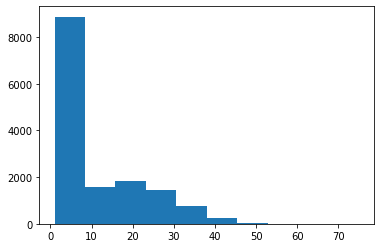

In [71]:
# lets look at sequence length
seq_length = [len(sent) for sent in clean_sentences]
print("The largest sequence length is: {}".format(max(seq_length)))
plt.hist(seq_length)
plt.show()

In [72]:
max_seq_length = 35
# now let's pad out X_data and Y_data
X = sequence.pad_sequences(X_data, maxlen=max_seq_length)
y = sequence.pad_sequences(y_data, maxlen=max_seq_length)

### Model RNN

In [78]:
embedding_vector_length = 100
vocabulary_size = len(wordToIndex)
n_tags = len(targetToIndex)

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=max_seq_length, mask_zero=True))
model.add(SimpleRNN(500, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 35, 100)           1715300   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 35, 500)           300500    
_________________________________________________________________
time_distributed (TimeDistri (None, 35, 10)            5010      
Total params: 2,020,810
Trainable params: 2,020,810
Non-trainable params: 0
_________________________________________________________________


In [79]:
X_train, X_val = X[4000:], X[:4000]
y_train, y_val = y[4000:], y[:4000]

In [80]:
checkpoint = ModelCheckpoint('SimpleRNNModel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [81]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint], batch_size=8, epochs=3, shuffle=True, verbose=1)

Train on 10724 samples, validate on 4000 samples
Epoch 1/3
10712/10724 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.8376
Epoch 00001: val_accuracy improved from -inf to 0.88385, saving model to SimpleRNNModel.h5
10724/10724 [==============================] - 63s 6ms/sample - loss: 0.1878 - accuracy: 0.8376 - val_loss: 0.1207 - val_accuracy: 0.8838
Epoch 2/3
10712/10724 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9330
Epoch 00002: val_accuracy improved from 0.88385 to 0.90988, saving model to SimpleRNNModel.h5
10724/10724 [==============================] - 65s 6ms/sample - loss: 0.0715 - accuracy: 0.9330 - val_loss: 0.1038 - val_accuracy: 0.9099
Epoch 3/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9558
Epoch 00003: val_accuracy improved from 0.90988 to 0.91342, saving model to SimpleRNNModel.h5
10724/10724 [==============================] - 61s 6ms/sample - loss: 0.0472 - accuracy: 0.9558 - v

In [82]:
what = model.predict_classes(X_val)

In [83]:
#use this cell to EXCLUDE padding from confusion matrix
count = 0
total = 0
pred = []
actual = []

for prediction in range(what.shape[0]):                        #<-- for each sequence
    for i in range(max_seq_length):                            #<-- each item in sequence
        if y_val[prediction][i]==0:                            #<-- if the corresponding y_val is <PAD> skip it
            pass
        else:                                                  #<-- otherwise
            if y_val[prediction][i]==what[prediction][i]:      #<-- compare the prediction to y_val
                count = count+1                                #<-- if the same increment count
            total=total+1                                      #<-- update total eligible predictions (not <PAD>)
            pred.append(what[prediction][i])                   #<-- add the prediction to list
            actual.append(y_val[prediction][i])                #<-- add corresponding actual to a list

In [103]:
print(f'The raw accuracy of the Simple RNN model is {(count / total) * 100}%')

The raw accuracy of the Simple RNN model is 91.3422106431225%


In [95]:
simpleRNNDF = pd.DataFrame(precision_recall_fscore_support(y_true=actual, y_pred=pred, average=None))

In [99]:
simpleRNNDF.index = ["Precision", "Recall", "FScore", "Support"]
simpleRNNDF.columns = [IndexToTarget[col] for col in list(set(actual))]

In [100]:
simpleRNNDF

,I-LOC,I-ORG,I-MISC,B-MISC,O,B-PER,B-ORG,I-PER,B-LOC
Precision,0.582524,0.673378,0.470284,0.759454,0.949427,0.795082,0.646778,0.861407,0.896498
Recall,0.598007,0.347174,0.566978,0.754697,0.981259,0.746920,0.543086,0.808539,0.788496
FScore,0.590164,0.458143,0.514124,0.757068,0.965081,0.770249,0.590414,0.834136,0.839036
Support,301.000000,867.000000,321.000000,958.000000,31855.000000,1948.000000,1497.000000,1499.000000,2208.000000


In [105]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    all_val = list(set(actual+pred))
    tick_marks = np.arange(len(all_val))
    plt.xticks(tick_marks,[IndexToTarget[i] for i in all_val], rotation=45)
    plt.yticks(tick_marks,[IndexToTarget[i] for i in all_val])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  180    13    10     3    67     4     2    14     8]
 [   27   301    25    15   393     9    25    29    43]
 [    3     3   182    15   105     2     1     8     2]
 [    0     3    12   723   140    23    25     6    26]
 [   58    38   127    63 31258   158    94    47    12]
 [    7    17     7    12   238  1455   145    50    17]
 [   18    18     9    77   370    90   813    26    76]
 [    4    43    10     1   155    38    19  1212    17]
 [   12    11     5    43   197    51   133    15  1741]]
Normalized confusion matrix
[[5.98e-01 4.32e-02 3.32e-02 9.97e-03 2.23e-01 1.33e-02 6.64e-03 4.65e-02
  2.66e-02]
 [3.11e-02 3.47e-01 2.88e-02 1.73e-02 4.53e-01 1.04e-02 2.88e-02 3.34e-02
  4.96e-02]
 [9.35e-03 9.35e-03 5.67e-01 4.67e-02 3.27e-01 6.23e-03 3.12e-03 2.49e-02
  6.23e-03]
 [0.00e+00 3.13e-03 1.25e-02 7.55e-01 1.46e-01 2.40e-02 2.61e-02 6.26e-03
  2.71e-02]
 [1.82e-03 1.19e-03 3.99e-03 1.98e-03 9.81e-01 4.96e-03 2.95e-03 1.48e-03


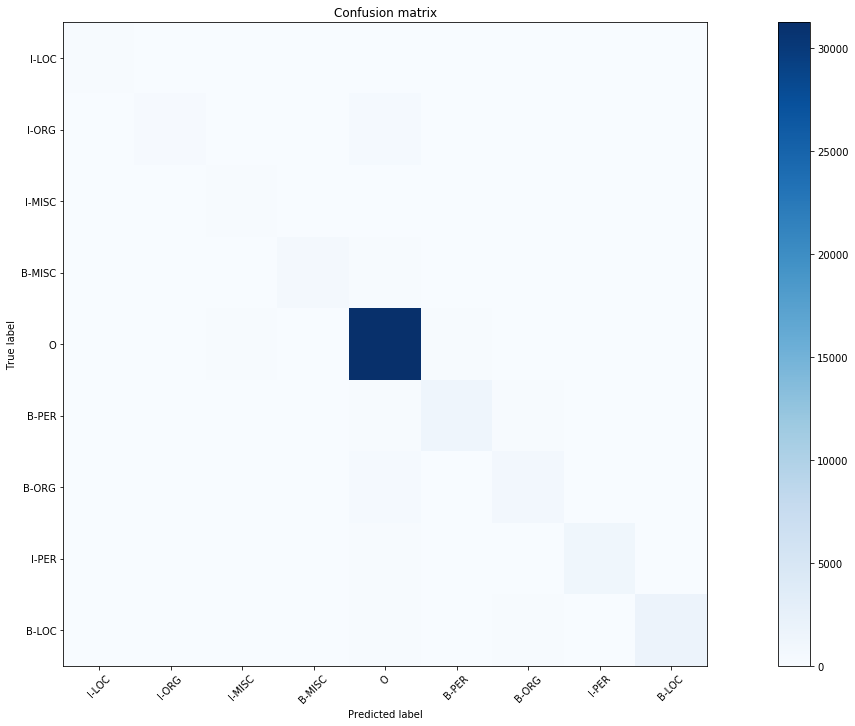

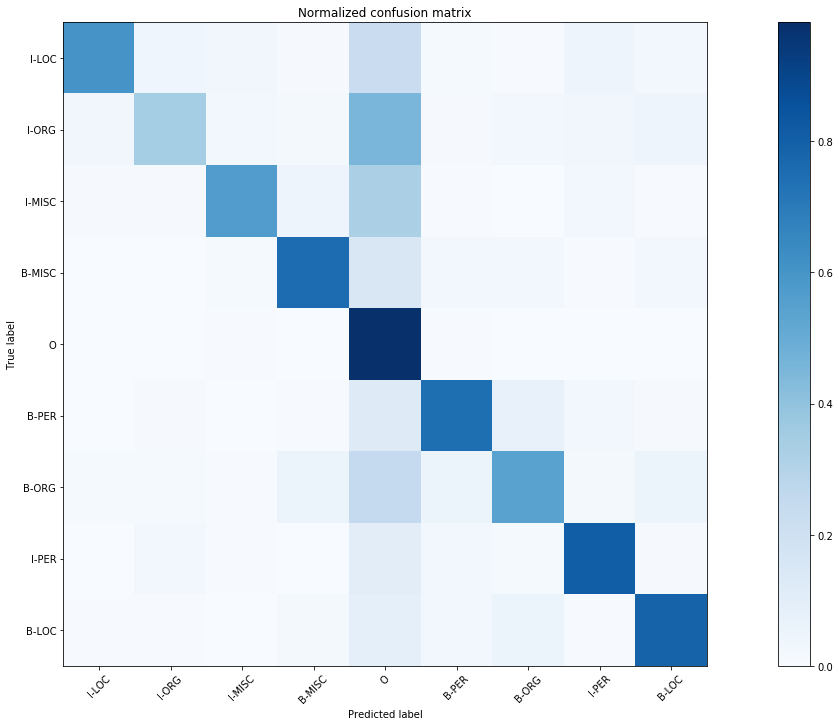

In [106]:
# Compute confusion matrix
cm = confusion_matrix(actual, pred)


np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
from matplotlib.pyplot import figure

plt.show()

### Model LSTM

In [107]:
embedding_vector_length = 100
vocabulary_size = len(wordToIndex)
n_tags = len(targetToIndex)

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=max_seq_length, mask_zero=True))
model.add(LSTM(500, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 35, 100)           1715300   
_________________________________________________________________
lstm (LSTM)                  (None, 35, 500)           1202000   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 35, 10)            5010      
Total params: 2,922,310
Trainable params: 2,922,310
Non-trainable params: 0
_________________________________________________________________


In [108]:
checkpoint = ModelCheckpoint('LSTMModel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [109]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint], batch_size=8, epochs=3, shuffle=True, verbose=1)

Train on 10724 samples, validate on 4000 samples
Epoch 1/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.1622 - accuracy: 0.8462
Epoch 00001: val_accuracy improved from -inf to 0.88513, saving model to SimpleRNNModel.h5
10724/10724 [==============================] - 510s 48ms/sample - loss: 0.1622 - accuracy: 0.8462 - val_loss: 0.1148 - val_accuracy: 0.8851
Epoch 2/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0550 - accuracy: 0.9465
Epoch 00002: val_accuracy improved from 0.88513 to 0.92080, saving model to SimpleRNNModel.h5
10724/10724 [==============================] - 500s 47ms/sample - loss: 0.0550 - accuracy: 0.9465 - val_loss: 0.0816 - val_accuracy: 0.9208
Epoch 3/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9687
Epoch 00003: val_accuracy did not improve from 0.92080
10724/10724 [==============================] - 500s 47ms/sample - loss: 0.0311 - accuracy: 0.9687 - val_loss: 0.0846 - val_accuracy: 0

In [111]:
what = model.predict_classes(X_val)

In [112]:
#use this cell to EXCLUDE padding from confusion matrix
count = 0
total = 0
pred = []
actual = []

for prediction in range(what.shape[0]):                        #<-- for each sequence
    for i in range(max_seq_length):                            #<-- each item in sequence
        if y_val[prediction][i]==0:                            #<-- if the corresponding y_val is <PAD> skip it
            pass
        else:                                                  #<-- otherwise
            if y_val[prediction][i]==what[prediction][i]:      #<-- compare the prediction to y_val
                count = count+1                                #<-- if the same increment count
            total=total+1                                      #<-- update total eligible predictions (not <PAD>)
            pred.append(what[prediction][i])                   #<-- add the prediction to list
            actual.append(y_val[prediction][i])                #<-- add corresponding actual to a list

In [113]:
print(f'The raw accuracy of the LSTM model is {(count / total) * 100}%')

The raw accuracy of the LSTM model is 91.64857432334635%


In [114]:
LSTMDF = pd.DataFrame(precision_recall_fscore_support(y_true=actual, y_pred=pred, average=None))
LSTMDF.index = ["Precision", "Recall", "FScore", "Support"]
LSTMDF.columns = [IndexToTarget[col] for col in list(set(actual))]
LSTMDF

,I-LOC,I-ORG,I-MISC,B-MISC,O,B-PER,B-ORG,I-PER,B-LOC
Precision,0.815900,0.377258,0.748252,0.890357,0.963380,0.827216,0.666412,0.84443,0.912538
Recall,0.647841,0.650519,0.666667,0.703549,0.969550,0.752053,0.581830,0.87992,0.817482
FScore,0.722222,0.477561,0.705107,0.786006,0.966455,0.787846,0.621255,0.86181,0.862398
Support,301.000000,867.000000,321.000000,958.000000,31855.000000,1948.000000,1497.000000,1499.00000,2208.000000


Confusion matrix, without normalization
[[  195    48     1     0    33     1     0    12    11]
 [   18   564     6     2   196     2    14    40    25]
 [    1    25   214     7    68     2     1     1     2]
 [    1    23    17   674   137    10    56     5    35]
 [   13   542    46    17 30885   117   160    60    15]
 [    0    58     1     4   242  1465    83    85    10]
 [    5    92     0    44   286   106   871    22    71]
 [    0    84     0     0    55    31     6  1319     4]
 [    6    59     1     9   157    37   116    18  1805]]
Normalized confusion matrix
[[6.48e-01 1.59e-01 3.32e-03 0.00e+00 1.10e-01 3.32e-03 0.00e+00 3.99e-02
  3.65e-02]
 [2.08e-02 6.51e-01 6.92e-03 2.31e-03 2.26e-01 2.31e-03 1.61e-02 4.61e-02
  2.88e-02]
 [3.12e-03 7.79e-02 6.67e-01 2.18e-02 2.12e-01 6.23e-03 3.12e-03 3.12e-03
  6.23e-03]
 [1.04e-03 2.40e-02 1.77e-02 7.04e-01 1.43e-01 1.04e-02 5.85e-02 5.22e-03
  3.65e-02]
 [4.08e-04 1.70e-02 1.44e-03 5.34e-04 9.70e-01 3.67e-03 5.02e-03 1.88e-03


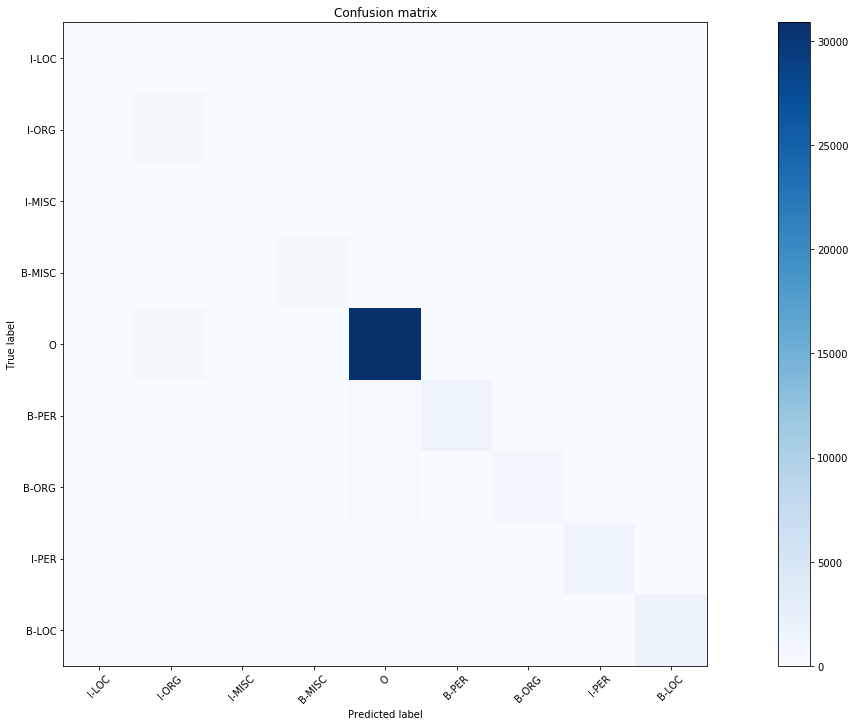

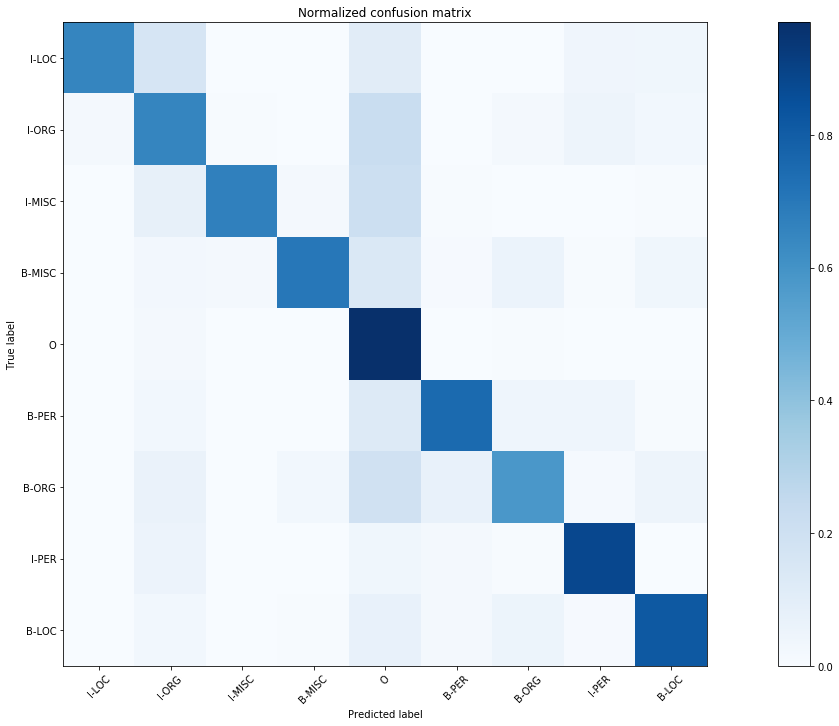

In [115]:
# Compute confusion matrix
cm = confusion_matrix(actual, pred)


np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
from matplotlib.pyplot import figure

plt.show()

### Model Bidirectional Simple RNN

In [117]:
embedding_vector_length = 100
vocabulary_size = len(wordToIndex)
n_tags = len(targetToIndex)

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=max_seq_length, mask_zero=True))
model.add(Bidirectional(SimpleRNN(500, return_sequences=True, recurrent_dropout=0.25, dropout=0.25)))
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 35, 100)           1715300   
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 1000)          601000    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 35, 10)            10010     
Total params: 2,326,310
Trainable params: 2,326,310
Non-trainable params: 0
_________________________________________________________________


In [118]:
checkpoint = ModelCheckpoint('BidirectionalModel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [119]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint], batch_size=8, epochs=3, shuffle=True, verbose=1)

Train on 10724 samples, validate on 4000 samples
Epoch 1/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.1738 - accuracy: 0.8504
Epoch 00001: val_accuracy improved from -inf to 0.88906, saving model to BidirectionalModel.h5
10724/10724 [==============================] - 110s 10ms/sample - loss: 0.1738 - accuracy: 0.8505 - val_loss: 0.1274 - val_accuracy: 0.8891
Epoch 2/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0641 - accuracy: 0.9403
Epoch 00002: val_accuracy improved from 0.88906 to 0.91234, saving model to BidirectionalModel.h5
10724/10724 [==============================] - 114s 11ms/sample - loss: 0.0641 - accuracy: 0.9403 - val_loss: 0.0947 - val_accuracy: 0.9123
Epoch 3/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0412 - accuracy: 0.9609
Epoch 00003: val_accuracy improved from 0.91234 to 0.92092, saving model to BidirectionalModel.h5
10724/10724 [==============================] - 114s 11ms/sample - loss: 0.0412 - ac

In [120]:
what = model.predict_classes(X_val)

In [121]:
#use this cell to EXCLUDE padding from confusion matrix
count = 0
total = 0
pred = []
actual = []

for prediction in range(what.shape[0]):                        #<-- for each sequence
    for i in range(max_seq_length):                            #<-- each item in sequence
        if y_val[prediction][i]==0:                            #<-- if the corresponding y_val is <PAD> skip it
            pass
        else:                                                  #<-- otherwise
            if y_val[prediction][i]==what[prediction][i]:      #<-- compare the prediction to y_val
                count = count+1                                #<-- if the same increment count
            total=total+1                                      #<-- update total eligible predictions (not <PAD>)
            pred.append(what[prediction][i])                   #<-- add the prediction to list
            actual.append(y_val[prediction][i])                #<-- add corresponding actual to a list

In [122]:
print(f'The raw accuracy of the Bidirectional model is {(count / total) * 100}%')

The raw accuracy of the Bidirectional model is 92.09243981280454%


In [127]:
BiDirDF = pd.DataFrame(precision_recall_fscore_support(y_true=actual, y_pred=pred, average=None))
BiDirDF.index = ["Precision", "Recall", "FScore", "Support"]
BiDirDF.columns = [IndexToTarget[col] for col in list(set(actual+pred))]
BiDirDF.drop(columns=['<PAD>'])

,I-LOC,I-ORG,I-MISC,B-MISC,O,B-PER,B-ORG,I-PER,B-LOC
Precision,0.725738,0.535354,0.653430,0.886978,0.945264,0.855872,0.741259,0.921340,0.920957
Recall,0.571429,0.550173,0.563863,0.753653,0.985057,0.740760,0.566466,0.789193,0.802083
FScore,0.639405,0.542662,0.605351,0.814898,0.964751,0.794166,0.642181,0.850162,0.857420
Support,301.000000,867.000000,321.000000,958.000000,31855.000000,1948.000000,1497.000000,1499.000000,2208.000000


Confusion matrix, without normalization
[[    0     0     0     0     0     0     0     0     0     0]
 [    0   172    38     7     0    66     3     1     5     9]
 [    0    15   477    11     6   281     8    21    17    31]
 [    0     0    19   181     8   107     2     0     2     2]
 [    0     1    12    11   722   162     6    25     1    18]
 [    0    21   185    51    24 31379    95    76    10    14]
 [    1     2    32     2     3   355  1443    56    41    13]
 [    0     3    59     3    37   415    69   848     9    54]
 [    1     0    43    11     1   191    45    13  1183    11]
 [    0    23    26     0    13   240    15   104    16  1771]]
Normalized confusion matrix
[[     nan      nan      nan      nan      nan      nan      nan      nan
       nan      nan]
 [0.00e+00 5.71e-01 1.26e-01 2.33e-02 0.00e+00 2.19e-01 9.97e-03 3.32e-03
  1.66e-02 2.99e-02]
 [0.00e+00 1.73e-02 5.50e-01 1.27e-02 6.92e-03 3.24e-01 9.23e-03 2.42e-02
  1.96e-02 3.58e-02]
 [0.00e+00 0.00e

/Users/bwilke/.conda/envs/NLPTF2/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


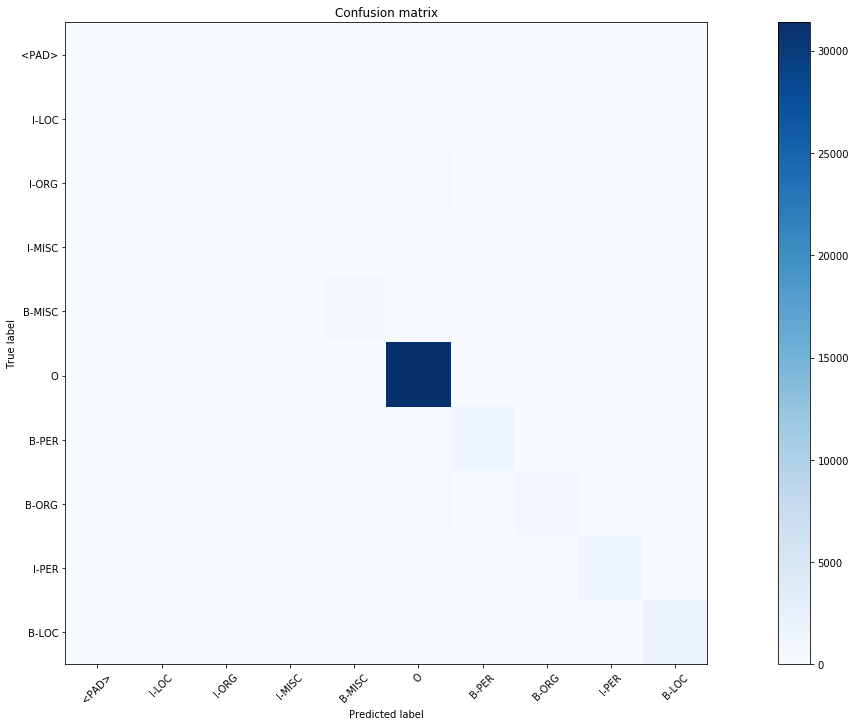

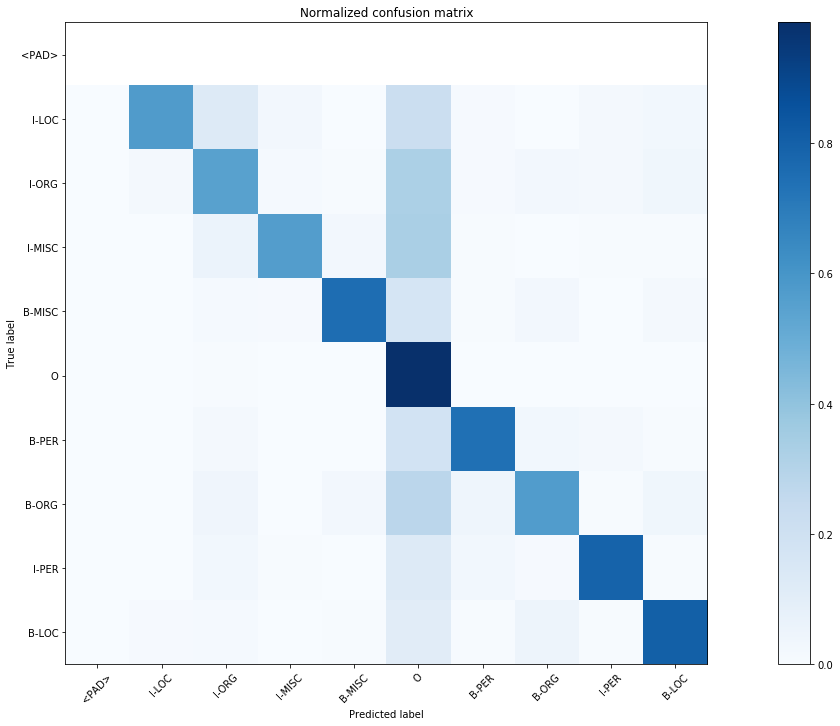

In [128]:
# Compute confusion matrix
cm = confusion_matrix(actual, pred)


np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
from matplotlib.pyplot import figure

plt.show()